### Gaussian High-pass and Low-pass filters in frequency domain



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import signal
from matplotlib.pyplot import imshow
from PIL import Image
import cv2
from scipy import signal
from scipy.fftpack import fft2, fftshift, ifftshift, ifft2


In [2]:
new_im=cv2.imread("fantasy.jpg",0) # convert to greyscale
new_im=cv2.resize(new_im, (512,512))# first width, second height

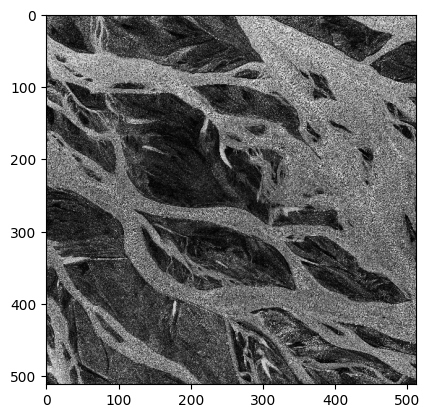

In [3]:
imshow(new_im, cmap='gray')
#new_im


### The Gaussian window is defined by $ w(n)=\exp^{\frac{-1}{2}{\frac{n}{\sigma}}^2}$ where $n$ is the number of pixels in the output window

In [27]:
from scipy.signal.windows import gaussian  # Import the gaussian window
from scipy.fftpack import fft2, fftshift, ifftshift, ifft2

# create a 2D-gaussian kernel、filter with the same size of the image
kernel = np.outer(signal.windows.gaussian(new_im.shape[0], 5), signal.windows.gaussian(new_im.shape[1], 5))# outer product of two vectors,
#each representing a 1D Gaussian window of size of 5 points

# find Fourier transform of the image f(x,y)
freq = fft2(new_im)
# generate a kernel whose origin is in the top-left corner
kern=ifftshift(kernel) # h(x,y)
# calculate FFT of the kernel
freq_kernel = fft2(kern)
# multiply in the frequency domain
product = freq*freq_kernel
# compute the final result
# take the inverse transform of the product and display the real part
im_out = ifft2(product).real # output blurred image

In [28]:
# scale image to original grey-level intensities in the range from 0 to 255
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(im_out)
im_out= scaler.transform(im_out)
im_out


array([[136.92153348, 125.60891302, 116.13533179, ..., 165.67983394,
        163.10499806, 149.66433847],
       [152.99088287, 139.86575525, 128.64543799, ..., 185.98018006,
        182.89984608, 167.58689658],
       [168.11044858, 153.37053538, 140.58589786, ..., 204.78554269,
        201.31837046, 184.35010374],
       ...,
       [ 93.25249352,  87.49739278,  83.37641662, ..., 108.65299362,
        107.99471492, 100.30675021],
       [105.99304022,  98.48583257,  92.67226393, ..., 125.65567897,
        124.33333078, 114.8372147 ],
       [120.89678593, 111.49612217, 103.86090409, ..., 145.11550243,
        143.13932638, 131.68065088]])

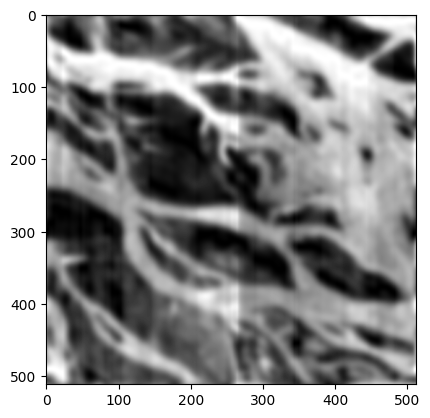

In [29]:
imshow(im_out, cmap='gray')


# Question 1: Is this a high-pass or a low-pass Gaussian filter? By modifying slightly the code above, create a 3-pixel Gaussian kernel and output the resulting image. What do you observe when you narrow the size of the Gaussian wiindow?



In [7]:
# type your answer here (that includes code)

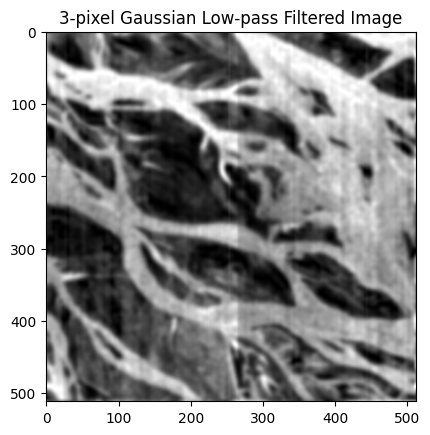

In [25]:
from scipy.signal.windows import gaussian  # Import the gaussian window
from scipy.fftpack import fft2, fftshift, ifftshift, ifft2


# Assuming 'new_im' is already loaded and preprocessed as grayscale
# Fourier Transform of the image
freq = fft2(new_im)

# Create a 3-pixel Gaussian kernel
kernel_3px = np.outer(gaussian(new_im.shape[0], 3), gaussian(new_im.shape[1], 3))

# Shift the kernel and calculate its FFT
kern_3px = ifftshift(kernel_3px)
freq_kernel_3px = fft2(kern_3px)

# Multiply in the frequency domain
product_3px = freq * freq_kernel_3px

# Inverse FFT to get the output image
im_out_3px = ifft2(product_3px).real

# Scale the image intensity back to 0-255
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(im_out_3px)
im_out_3px = scaler.transform(im_out_3px)

# Display the result of the 3-pixel Gaussian filter
plt.imshow(im_out_3px, cmap='gray')
plt.title('3-pixel Gaussian Low-pass Filtered Image')
plt.show()


In [30]:
kernel_3px = np.outer(signal.windows.gaussian(3, std=1), signal.windows.gaussian(3, std=1))

# Normalize the kernel
kernel_3px /= np.sum(kernel_3px)

# Compute Fourier transform of the image
freq = fft2(new_im)

# Generate a kernel whose origin is in the top-left corner
kern_3px = ifftshift(kernel_3px)

# Compute Fourier transform of the kernel
freq_kernel_3px = fft2(kern_3px)

# Multiply in the frequency domain
product_3px = freq * freq_kernel_3px

# Inverse FFT to get the output image
im_out_3px = ifft2(product_3px).real

# Scale image to original grey-level intensities in the range from 0 to 255
scaler = MinMaxScaler(feature_range=(0, 255))
im_out_3px = scaler.fit_transform(im_out_3px)

# Display the resulting image
plt.imshow(im_out_3px, cmap='gray')
plt.title('Image with 3-pixel Gaussian Filter')
plt.axis('off')
plt.show()

ValueError: operands could not be broadcast together with shapes (512,512) (3,3) 

In [8]:
# high-pass Gaussian filtered image is found by subtracting low-pass filtered image from the original one

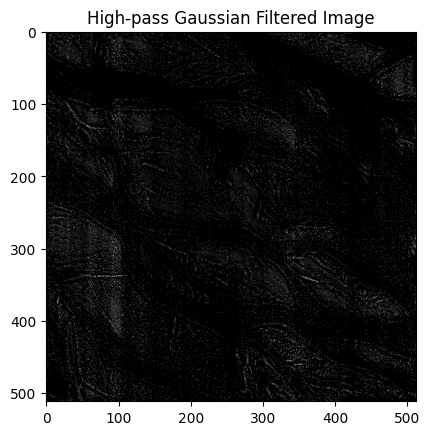

In [13]:
# High-pass filter by subtracting the low-pass filtered image from the original
high_pass = new_im - im_out_3px

# Scale the high-pass filtered image intensity back to 0-255
high_pass = np.clip(high_pass, 0, 255)  # Ensure pixel values are in the valid range

# Display the high-pass filtered image
plt.imshow(high_pass, cmap='gray')
plt.title('High-pass Gaussian Filtered Image')
plt.show()


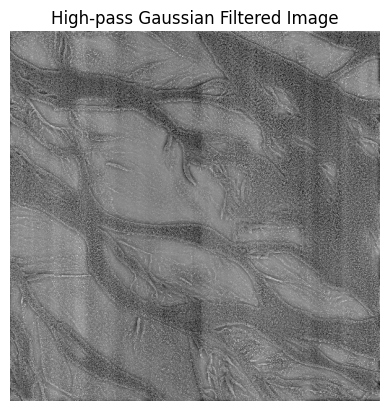

In [16]:
high_pass = new_im - im_out_3px

# Flatten the image to a 2D array for scaling
high_pass_flat = high_pass.reshape(-1, 1)

# Initialize the MinMaxScaler to scale to the range [0, 255]
scaler = MinMaxScaler(feature_range=(0, 255))

# Fit and transform the flattened high-pass image
high_pass_scaled = scaler.fit_transform(high_pass_flat)

# Reshape back to the original image dimensions
high_pass = high_pass_scaled.reshape(new_im.shape)

# Display the high-pass filtered image
plt.imshow(high_pass, cmap='gray')
plt.title('High-pass Gaussian Filtered Image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

### Question 2: What would a high-pass Gaussian filter be useful for in the context of image processing?  


A high-pass Gaussian filter is used in image processing for several purposes:

1. **Edge Detection**: High-pass filters enhance the edges and boundaries within an image. By removing low-frequency components (smooth areas), they make the edges more pronounced, which is useful in edge detection algorithms.

2. **Detail Enhancement**: High-pass filtering can bring out fine details and textures that may be obscured in the original image. This is beneficial for applications requiring high-resolution details, such as in medical imaging or satellite imagery.

3. **Sharpening**: High-pass filters can be used as part of an image sharpening process. By subtracting a blurred version of the image (low-pass filter) from the original, high-pass filters accentuate high-frequency components, thus enhancing the sharpness of the image.

4. **Noise Reduction**: In some cases, high-pass filtering can help in reducing certain types of noise that manifest as high-frequency components. By focusing on high-frequency details and ignoring smooth regions, specific noise patterns can be filtered out.

5. **Feature Extraction**: In machine learning and computer vision, high-pass filters are used to extract features from images that are useful for object recognition, pattern matching, and other analysis tasks.

In summary, high-pass Gaussian filters are valuable for enhancing details, detecting edges, and improving the overall clarity of images by focusing on high-frequency components and suppressing low-frequency information.
